# <center>Bias and Variance</center>
## <div align='right'>Made by:</div>
**<div align='right'>Ihor Markevych</div>**

Consider a learning scenario where the goal is to learn the target function $f(x)=sin(\pi x)$ for $-1 \leq x \leq +1$ from two points in the training sets. The two training points in $R^2$ have a uniform distribution between $-1$ and $+1$. You are to choose a model from the constant hypothesis set $y=b$ or linear hypothesis set $y = mx+b$ based on bias-variance analysis.  
  
1. Generate 10,000 hypotheses in each hypothesis space. Report the average hypothesis $\bar{g}(x)$ in each case.
1. Find and report $bias^2$ for each model.
1. Find and report variance for each model.
1. For each case, plot $\bar{g}(x)\pm \sqrt{var}$ along with  $\bar{g}(x)$ and target function $f(x)=sin(\pi x)$. Which model will you choose? Why?

Round your answers to 3 decimal points.

**Hypothesis evaluated at dataset $D$**: $g^D(x)$.  
**Target function:** $f(x)$.  
**Average hypothesis:** $\bar{g}(x) = E_D\left[g^D(x)\right]$.  
**Bias (as function):**  $bias(x) = \bar{g}(x) - f(x)$.  
**Bias^2 (as value):**  $E_x\left[(\bar{g}(x) - f(x))^2\right]$.  
**Variance (as function)**:  $var(x) = E_D\left[(g^D(x)-\bar{g}(x))^2\right]$.  
**Variance (as value)**:  $var = E_xE_D\left[(g^D(x)-\bar{g}(x))^2\right]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

For fitting constant hypothesis we will take following equation: 
$$y=\frac{y_2 + y_1}{2}.$$

For linear hypothesis, since we have exactly two points:
$$y=\frac{y_2 - y_1}{x_2 - x_1} * x + y_2 - \frac{y_2 - y_1}{x_2 - x_1} * x2.$$

#### Target function:

In [2]:
def target(x):
    return np.sin(np.pi * x)

### Constant hypothesis:

#### Fitting:

In [3]:
def fitConst(x, y):
    return [np.mean(y)]

#### Predicting:

In [4]:
def const(x, params):
    return params[:,0]

### Linear hypothesis:

#### Fitting:

In [5]:
def fitLine(x, y):
    k = (y[1] - y[0]) / (x[1] - x[0])
    b = y[1] - (y[1] - y[0]) / (x[1] - x[0]) * x[1]
    return [k, b]

#### Predicting:


In [6]:
def line(x, params):
    return params[:, 0] * x + params[:, 1]

### Bias and Variance Analysis:

In [7]:
def biasVarianceAnalysis(target, fit, predict, 
                         N=10000, 
                         gen=lambda : np.random.uniform(-1, 1, 2), 
                         space=np.arange(-1,1,0.001)):
        
    '''
    target - target function,
    
    fit - fit method for selected hypothesis,

    predict - prediction method for selected hypothesis, should accept parameter x (value(s) at which target value will be evaluated) and parameters (in same form as `fit` returns)
    
    Both fit and predict should be vectorized.
    
    N - number of random data generation,
    
    gen - generation of random data,
    
    space - x space that will be used to evaluate expected value of bias and variance
    '''
    
    np.random.seed(123)
    
    # generate N hypothesis
    hypothesises = []
    
    for i in range(N):
        dataX = gen()
        dataY = target(dataX)
        hypothesises += [fit(dataX, dataY)]
        
    hypothesises = np.array(hypothesises)
    
    # find average hypothesis
    averageHypothesis = np.mean(hypothesises, axis=0).reshape(1,-1)
    
    # find bias and its expected value
    biasX = lambda x: predict(x, averageHypothesis) - target(x)
    bias2 = np.mean([biasX(x) ** 2 for x in space])
    
    # find variance and its expected value
    varianceX = lambda x: np.sum((predict(x, hypothesises) - predict(x, averageHypothesis)) ** 2) / (N - 1)
    variance = np.mean([varianceX(x) for x in space])
    
    return averageHypothesis, bias2, variance, biasX, varianceX

### Results

**For constant model:**

In [8]:
constRes = biasVarianceAnalysis(target, fitConst, const)
print(f'Model:\t\ty={round(constRes[0][0][0], 3)}')
print(f'Bias^2:\t\t{round(constRes[1], 3)}')
print(f'Variance:\t{round(constRes[2], 3)}')

Model:		y=0.004
Bias^2:		0.5
Variance:	0.252


**For linear model:**

In [9]:
lineRes = biasVarianceAnalysis(target, fitLine, line)
print(f'Model:\t\ty={round(lineRes[0][0][0], 3)}x + {round(lineRes[0][0][1], 3)}')
print(f'Bias^2:\t\t{round(lineRes[1], 3)}')
print(f'Variance:\t{round(lineRes[2], 3)}')

Model:		y=0.78x + -0.001
Bias^2:		0.206
Variance:	1.674


### Variance:

In [10]:
xDots = []
targetDots = []

constDots = []
constUp = []
constBot = []

linearDots = []
linearUp = []
linearBot = []

for x in np.arange(-1, 1, 0.01):
    xDots.append(x)
    targetDots.append(target(x))
    
    constDots += list(const(x, constRes[0]))
    constUp += list(const(x, constRes[0]) + constRes[-1](x) ** 0.5)
    constBot += list(const(x, constRes[0]) - constRes[-1](x) ** 0.5)
    
    linearDots += list(line(x, lineRes[0]))
    linearUp += list(line(x, lineRes[0]) + lineRes[-1](x) ** 0.5)
    linearBot += list(line(x, lineRes[0]) - lineRes[-1](x) ** 0.5)

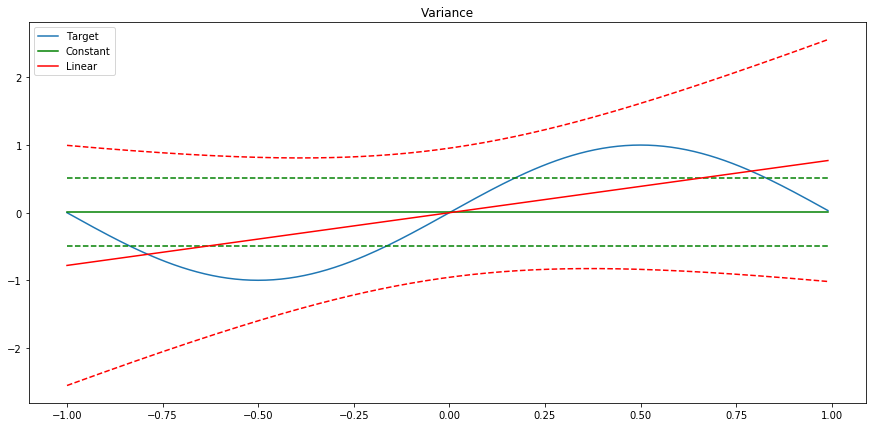

In [11]:
plt.figure(figsize=(15,7))

plt.plot(xDots, targetDots, label='Target')

plt.plot(xDots, constDots, color = 'green', label='Constant')
plt.plot(xDots, constUp, linestyle = "dashed", color = 'green')
plt.plot(xDots, constBot, linestyle = "dashed", color = 'green')

plt.plot(xDots, linearDots, color = 'red', label='Linear')
plt.plot(xDots, linearUp, linestyle = "dashed", color = 'red')
plt.plot(xDots, linearBot, linestyle = "dashed", color = 'red')

plt.title('Variance')
plt.legend()
plt.show()

### Bias:

In [12]:
xDots = []
targetDots = []

constDots = []
constBias = []

linearDots = []
linearBias = []

for x in np.arange(-1, 1, 0.01):
    xDots.append(x)
    targetDots.append(target(x))
    
    constDots += list(const(x, constRes[0]))
    constBias += [constRes[-2](x)]
    
    linearDots += list(line(x, lineRes[0]))
    linearBias += [lineRes[-2](x)]

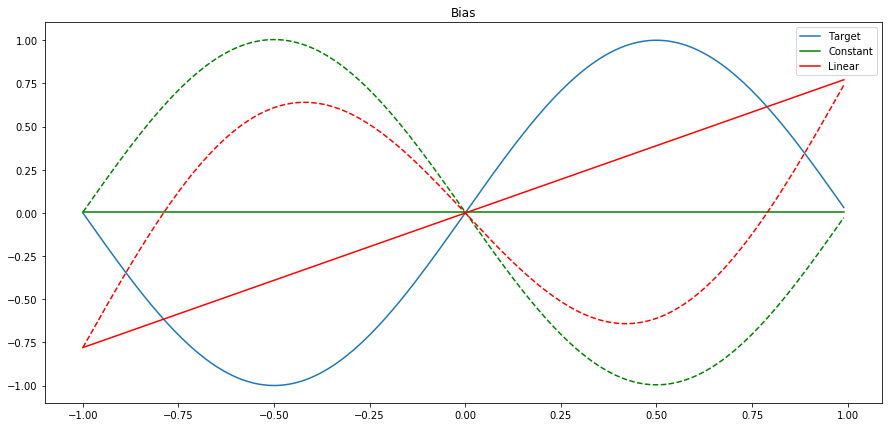

In [13]:
plt.figure(figsize=(15,7))

plt.plot(xDots, targetDots, label='Target')

plt.plot(xDots, constDots, color = 'green', label='Constant')
plt.plot(xDots, constBias, linestyle = "dashed", color = 'green')

plt.plot(xDots, linearDots, color = 'red', label='Linear')
plt.plot(xDots, linearBias, linestyle = "dashed", color = 'red')

plt.title('Bias')
plt.legend()
plt.show()

### Conclusion:

Even despite constant model has higher bias, it appeared to be better fit for this data, as both models have comparable bias, but linear model has significantly higher variance and total error.